<div class = "alert alert-block alert-info"> 
    
# Programmation fonctionnelle : Les déplacements sur un échiquier 
    
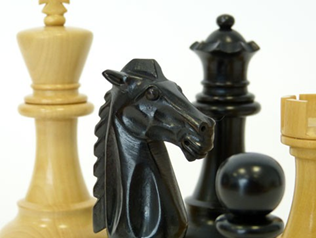   
    
## Objectifs du notebook
    
Modéliser les déplacements de plusieurs pièces du jeu d'échec en utilisant le paradigme fonctionnel. Il s'agit de mettre en application les fonctions de python suivantes :
- lambda
- map
- filter
- reduce
   
  
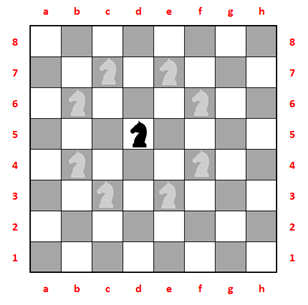
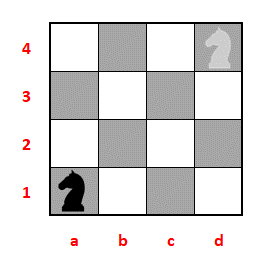

In [1]:
from functools import reduce

<div class = "alert alert-block alert-warning">

    
## filtrer les cases sur l'échiquier
    
Nous aurons besoin d'une fonction qui permet de savoir si une case est bien sur l'échiquier : 'A1', 'A2', ... 'H8' sont des cases valides 'Z0' et '$2' non ! 
    
En utilisant lambda, crée une fonction qui renvoi **True** si la case **c** est sur l'échiquier, **False** sinon. **c** est un str de la forme 'A1', ou 'H8'.
    
```python
est_sur_echiquier = lambda c: 65 <= ord(...) < 65 + ... and ...  
```    

In [2]:
est_sur_echiquier = lambda c: 65 <= ord(c[0]) < 65 + 8 and 49 <= ord(c[1]) < 49 + 8

In [3]:
assert est_sur_echiquier('A1') == True
assert est_sur_echiquier('H8') == True
assert est_sur_echiquier('H9') == False
assert est_sur_echiquier('H0') == False
assert est_sur_echiquier('I8') == False
assert est_sur_echiquier('@8') == False

<div class = "alert alert-block alert-warning">
    
On génère ci-dessous une liste de 100 cases avec des noms aléatoires, certaines sont sur l'échiquier et d'autres n'existe pas :

In [4]:
from random import randint

lst_cases = [chr(randint(60, 80)) + chr(randint(49, 60)) for i in range(100)]
lst_cases

['L5', 'P8', 'O7', 'F3', 'C;', 'E;', '@3', 'L;', 'J3', 'H3', 'I3', 'F8', 'L3', 'G:', 'D;', '=<', '=2', '=<', '<;', '>;', 'N6', 'K3', 'K6', 'J8', '@2', 'A2', '=4', '?8', 'K:', '?:', '@5', 'C5', 'O4', 'K8', '<7', 'L4', 'O7', 'D9', 'P6', '@2', 'C:', 'N6', '?;', 'J<', 'O;', '@5', 'C3', 'N<', '?7', 'B2', 'H8', 'L8', 'L5', '?9', 'G;', 'G7', 'M4', '=9', 'H8', 'B6', 'F;', '<8', 'P5', 'B2', 'P9', 'G<', 'G7', '@1', 'G8', 'O2', 'A4', 'F;', 'L<', 'N:', 'P3', 'O<', 'E9', 'J8', 'C9', 'K3', '>2', 'K:', '?6', 'G<', 'F9', 'M:', 'C:', 'K<', 'E5', 'K3', '=:', 'E5', 'J7', '@7', 'C<', 'M;', 'G9', 'I3', '?9', '?5']

<div class = "alert alert-block alert-warning">
    
    
### A vous de jouer !  
    
Utilise **filter** et une fonction lambda pour trouver la liste des cases de **lst_cases** qui sont sur l'échiquier. Ecris une fonction nommée **filtre_echiquier** qui en paramètre une liste de cases.

In [5]:
def filtre_echiquier(lst_c):
    return list(filter(lambda c: 65 <= ord(c[0]) < 65 + 8 and 49 <= ord(c[1]) < 49 + 8, lst_c))

filtre_echiquier(lst_cases)

['F3', 'H3', 'F8', 'A2', 'C5', 'C3', 'B2', 'H8', 'G7', 'H8', 'B6', 'B2', 'G7', 'G8', 'A4', 'E5', 'E5']

<div class = "alert alert-block alert-info"> 
    
## Les déplacement des pièces
    
### Le cavalier

Les déplacements du cavalier sont assez particuliers : Il avance de deux cases, puis translate d’une case vers la gauche ou vers la droite. Il a donc, si son mouvement ne rencontre pas les bords de l’échiquier, huit positions possibles :
    
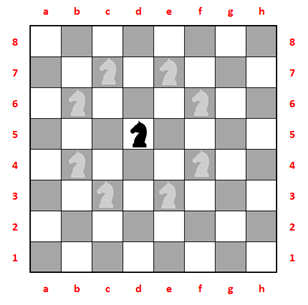    
    
On peut alors modéliser les déplacement possibles du cavalier par une liste de tuple contenant (dx, dy), le nombre de cases du saut sur les deux axes de l'échiquier.
    
```python
dep_cavalier = [(-1, -2), (-1, 2), (1, -2), (1, 2), (-2, -1), (-2, 1), ..., ...]    
```    
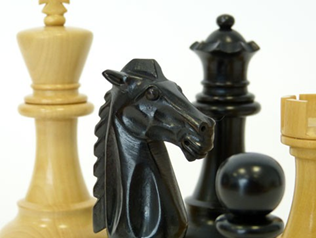
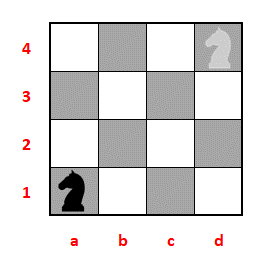
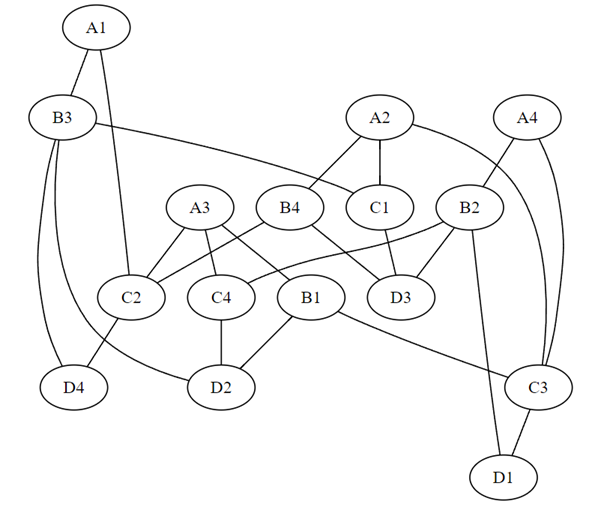

<div class = "alert alert-block alert-warning">
    
    
### A vous de jouer !  
    
Compléte les deux déplacements manquants :

In [6]:
dep_cavalier = [(-1, -2), (-1, 2), (1, -2), (1, 2), (-2, -1), (-2, 1), (2, -1), (2, 1)]

!!! info La fonction **ajoute()**
La fonction **ajoute(c, dx, dy)** permet déterminer le nom de la case d'arrivée lors d'un déplacement **dx, dy** depuis la case **c**.
!!!

In [7]:
def ajoute(c, dx, dy):
    """ajoute les valeur dx et dy a la case c.
    
    pametres
    --------
    c : str
        Une case de 'A1' à 'H8'
    dx : int
        valeur a ajouter à la coordonnée sur x (la lettre)
    dy : int
        valeur a ajouter à la coordonnée sur y (le chiffre)
        
    return
    ------
    str
        Une case (de l'échiquier ou pas) sous forme 'G5'. 
        Attention la fonction ne vérifie pas que la case est sur l'échiquier.
        
    """
    assert len(c) == 2 and isinstance(c, str), 'préconditions non remplies.'
    return chr(ord(c[0]) + dx) + chr(ord(c[1]) + dy)

print(ajoute('A1', 1, 3))
print(ajoute('B4', -1, -3))
print(ajoute('A1', -1, -1))
print(ajoute('H8', 1, 1))


B4
A1
@0
I9


<div class = "alert alert-block alert-warning">
    
    
### Créer la liste des cases accessibles 
    
Utilise **map**, **ajoute** et la liste de déplacement **dep_cavalier** pour fournir la liste des cases accessibles depuis la case D5 par un cavalier. Complète le code suivant :
    
```python
list(map(lambda d: ajoute('D5', d[...], ...), ...))    
```    

In [8]:
list(map(lambda d: ajoute('D5', d[0], d[1]), dep_cavalier))

['C3', 'C7', 'E3', 'E7', 'B4', 'B6', 'F4', 'F6']

<div class = "alert alert-block alert-warning">
    
    
### Une fonction pour automatiser l'opération 
    
Ecris une fonction **deplacement_0(c, dep_piece)** qui renvoi la liste des cases accessibles de **c** en fonction de la liste de deplacement **dep_piece** de la pièce.

In [9]:
def deplacement_0(c, dep_piece):
    return ... 

deplacement_0('D5', dep_cavalier)

Ellipsis

In [10]:
def deplacement_0(c, dep_piece):
    return list(map(lambda d: ajoute(c, d[0], d[1]), dep_piece)) 

deplacement_0('D5', dep_cavalier)

['C3', 'C7', 'E3', 'E7', 'B4', 'B6', 'F4', 'F6']

In [11]:
assert deplacement_0('D5', dep_cavalier) == ['C3', 'C7', 'E3', 'E7', 'B4', 'B6', 'F4', 'F6']
assert deplacement_0('A1', dep_cavalier) == ['@/', '@3', 'B/', 'B3', '?0', '?2', 'C0', 'C2']
assert deplacement_0('H8', dep_cavalier) == ['G6', 'G:', 'I6', 'I:', 'F7', 'F9', 'J7', 'J9']

<div class = "alert alert-block alert-warning">
    
    
### Filtrer les cases qui sont sur l'échiquier
    
Tu dois constater que certaines cases renvoyées par la fonction **deplacement_0** sont en dehors de l'échiquier. Propose une nouvelle fonction **deplacement** qui filtre les bonnes cases en utilisant la fonction **filtre_echiquier**.

In [12]:
def deplacement(c, dep_piece):
    return filtre_echiquier(map(lambda d: ajoute(c, d[0], d[1]), dep_piece))

deplacement('H8', dep_cavalier)

['G6', 'F7']

In [13]:
assert deplacement('D5', dep_cavalier) == ['C3', 'C7', 'E3', 'E7', 'B4', 'B6', 'F4', 'F6']
assert deplacement('A1', dep_cavalier) == ['B3', 'C2']
assert deplacement('H8', dep_cavalier) == ['G6', 'F7']

<div class = "alert alert-block alert-info"> 
    
### La tour

La tour se déplace d'autant de case que l'on souhaite mais uniquement verticalement et horizontalement. Ainsi, au départ de la case 'D5', elle peut atteindre en un coup toutes les cases suivantes :
    
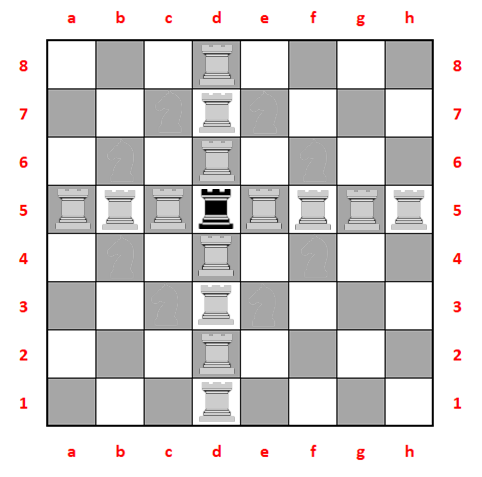
    
#### Liste des déplacements
    
Le script impératif suivant génère la liste des déplacements de la tour, sans se préoccuper des limites de l'échiquier :
    
``` python
dep_tour = []
    
for d in range(1, 8):
    dep_tour.extend([(0, d), (0, -d), (d, 0), (-d, 0)])
```    
    
    
On obtient 
    
```python
>>> dep_tour   
[(0, 1), (0, -1), (1, 0), (-1, 0), (0, 2), (0, -2), (2, 0), (-2, 0), (0, 3), (0, -3), (3, 0), (-3, 0), (0, 4), (0, -4), (4, 0), (-4, 0), (0, 5), (0, -5), (5, 0), (-5, 0), (0, 6), (0, -6), (6, 0), (-6, 0), (0, 7), (0, -7), (7, 0), (-7, 0)]    
```     
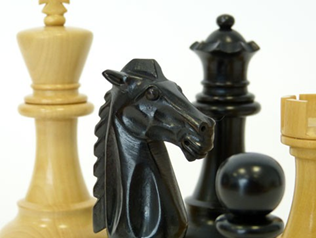
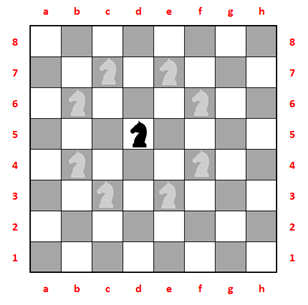
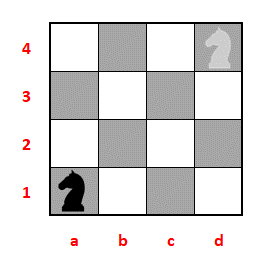
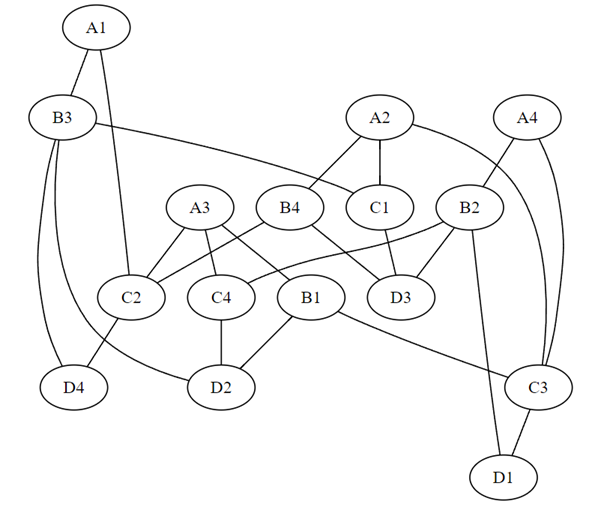

<div class = "alert alert-block alert-warning">
    
    
### A vous de jouer !  
    
Donne deux instructions qui rends ce script non conforme au paradigme fonctionnel. 

<div class = "alert alert-block alert-warning">
    
    
Ecris la liste **dep_tour** en utilisant **reduce** et en respectant le paradigme fonctionnel. 
    
```python
dep_tour = reduce(lambda a, b: a + ..., ..., [])    
```  
   

In [14]:
dep_tour = reduce(lambda a, b: a + [(0, b), (0, -b), (b, 0), (-b, 0)], range(1, 8), [])
dep_tour

[(0, 1), (0, -1), (1, 0), (-1, 0), (0, 2), (0, -2), (2, 0), (-2, 0), (0, 3), (0, -3), (3, 0), (-3, 0), (0, 4), (0, -4), (4, 0), (-4, 0), (0, 5), (0, -5), (5, 0), (-5, 0), (0, 6), (0, -6), (6, 0), (-6, 0), (0, 7), (0, -7), (7, 0), (-7, 0)]

<div class = "alert alert-block alert-warning">
    
    
Utilise la fonction **deplacement** et la liste **dep_tour** pour créer la liste de toutes les cases accessibles en un coup depuis 'D5'. Il y en a 14 !
   

In [15]:
deplacement('D5', dep_tour)

['D6', 'D4', 'E5', 'C5', 'D7', 'D3', 'F5', 'B5', 'D8', 'D2', 'G5', 'A5', 'D1', 'H5']

<div class = "alert alert-block alert-info"> 
    
### Plusieurs déplacements de suite
    
On souhaite répondre aux questions suivantes :     
- quel sont les cases accessibles au cavalier après 2, 3, ou 6 déplacements ?
- combien de déplacements sont necessaires au cavalier pour couvrir tout l'échiquier ?    
- en combien de déplacements une tour peut rejoindre n'importe quelle case de l'échiquier ? (celle-ci n'est pas trop compliquée à résoudre ...)

Déplacements du cavalier :    
    

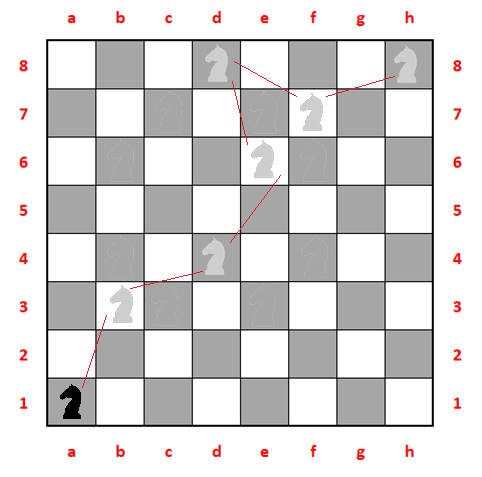    
    
     
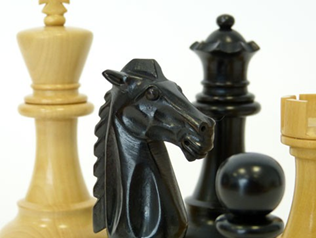
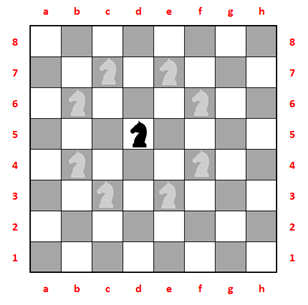
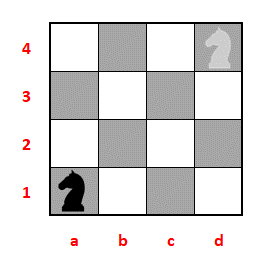
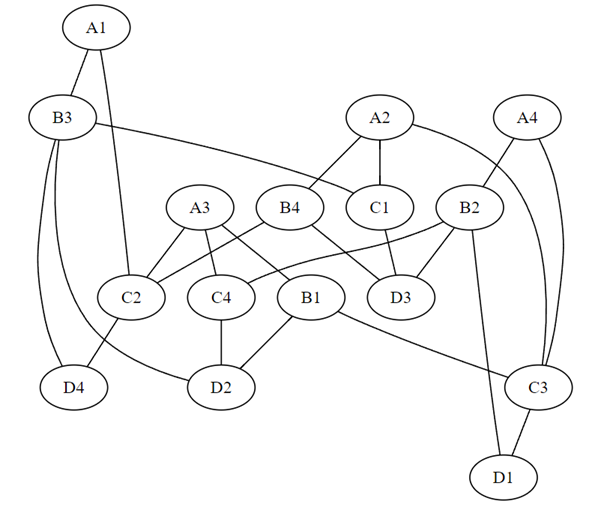
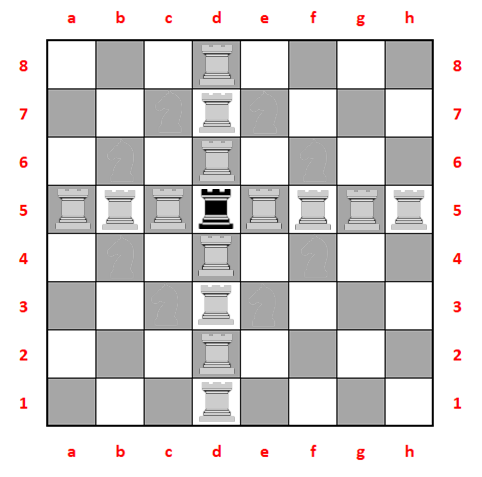

<div class = "alert alert-block alert-warning">
    
    
### A vous de jouer !
    
### Un déplacement depuis plusieurs cases de départ    
    
Ecris un fonctions **deplacements(lst_c, dep_piece)** avec un **s**, qui prend en paramètre une liste de points de départ **lst_c** et une liste de déplacements **dep_piece** et qui renvoie la liste des cases d'arrivée possibles après un déplacement. Utilise **reduce**.

Complète le code suivant :    
    
```python
def deplacements(lst_c, dep_piece):
    return reduce(lambda acc, c: acc + ..., lst_c, ...)    
```  
    
Exemple : 1 déplacement depuis les positions 'B3' ou 'C2' permet d'atteindre les cases :
    
```python
>>> deplacements(['B3', 'C2'], dep_cavalier)
['A1', 'A5', 'C1', 'C5', 'D2', 'D4', 'B4', 'D4', 'A1', 'A3', 'E1', 'E3']    
```
    
La réponse comporte des doublons, c'est normal, plusieurs chemin mênent à la même case.    

In [16]:
def deplacements(lst_c, dep_piece):
    return reduce(lambda acc, c: acc + deplacement(c, dep_piece), lst_c, [])

deplacements(['B3', 'C2'], dep_cavalier)

['A1', 'A5', 'C1', 'C5', 'D2', 'D4', 'B4', 'D4', 'A1', 'A3', 'E1', 'E3']

<div class = "alert alert-block alert-warning">

### Plusieurs déplacements de suite
    
Ecris un fonctions **n_deplacements(lst_c, dep_piece, n)** qui renvoi la liste des cases d'arrivée possibles depuis les positions **lst_c** après **n** déplacements. C'est une fonction récursive :
    
- condition d'arrêt : si 0 déplacements à effectuer, la pièce reste à la même place.
- sinon, elle réalise 1 déplacement à partir des positions obtenues après n - 1 déplacements    

Complète le code suivant :    
```python
def n_deplacements(lst_c, dep_piece, n):
    return ... if n == ... else deplacements(..., dep_piece)   
``` 
    
Cases accessibles au cavalier depuis 'A1' en 3 déplacements :
```python
>>> n_deplacements(['A1'], dep_cavalier, 3)
['B3', 'C2', 'B3', 'B7', 'C4', 'C6', 'B3', 'D3', 'A2', 'E2', 'B3', 'B7', 'D3', 'D7', 'A4', 'A6', 'E4', 'E6', 'C4', 'E4', 'B1', 'B3', 'F1', 'F3', 'C2', 'C6', 'E2', 'E6', 'B3', 'B5', 'F3', 'F5', 'A2', 'A6', 'C2', 'C6', 'D3', 'D5', 'C2', 'C6', 'E2', 'E6', 'B3', 'B5', 'F3', 'F5', 'B3', 'C2', 'B1', 'B5', 'C2', 'C4', 'D3', 'F3', 'C2', 'G2', 'D1', 'D5', 'F1', 'F5', 'C2', 'C4', 'G2', 'G4']    
```     
    
    

In [17]:
def n_deplacements(lst_c, dep_piece, n):
    return lst_c if n == 0 else deplacements(n_deplacements(lst_c, dep_piece, n - 1), dep_piece)

n_deplacements(['A1'], dep_cavalier, 2)

['A1', 'A5', 'C1', 'C5', 'D2', 'D4', 'B4', 'D4', 'A1', 'A3', 'E1', 'E3']

In [18]:
n_deplacements(['A1'], dep_cavalier, 3)

['B3', 'C2', 'B3', 'B7', 'C4', 'C6', 'B3', 'D3', 'A2', 'E2', 'B3', 'B7', 'D3', 'D7', 'A4', 'A6', 'E4', 'E6', 'C4', 'E4', 'B1', 'B3', 'F1', 'F3', 'C2', 'C6', 'E2', 'E6', 'B3', 'B5', 'F3', 'F5', 'A2', 'A6', 'C2', 'C6', 'D3', 'D5', 'C2', 'C6', 'E2', 'E6', 'B3', 'B5', 'F3', 'F5', 'B3', 'C2', 'B1', 'B5', 'C2', 'C4', 'D3', 'F3', 'C2', 'G2', 'D1', 'D5', 'F1', 'F5', 'C2', 'C4', 'G2', 'G4']

<div class = "alert alert-block alert-warning">
    
### Créer une liste sans doublons

On va maintenant supprimer les doublons.      

Écris une fonction qui prend une liste de nombres, puis utilise **reduce** pour retourner une nouvelle liste contenant les même termes mais sans doublon.
    
Exemple d'utilisation :
    
```python
>>> liste_sans_doublon([1, 2, 3, 1, 2, 4, 3, 1, 2, 1, 5, 6, 1, 3, 7])
[1, 2, 3, 4, 5, 6, 7]    
```   

In [19]:
def liste_sans_doublon(lst):
    return reduce(lambda acc, c: acc + [c] if c not in acc else acc, lst, [])

liste_sans_doublon([1, 2, 3, 1, 2, 4, 3, 1, 2, 1, 5, 6, 1, 3, 7])

[1, 2, 3, 4, 5, 6, 7]

<div class = "alert alert-block alert-warning">
    
### Les déplacements du cavalier
    
En utilisant les fonctions précédentes, indique où peut se trouver le cavalier après 0, 1, 2, ... 6 déplacements depuis 'A1'.   

In [20]:
lst_cases_apres_n_dep = map(lambda n: liste_sans_doublon(n_deplacements(['A1'], dep_cavalier, n)), range(0, 7))

for c in lst_cases_apres_n_dep:
    print(c, end='\n\n')

['A1']

['B3', 'C2']

['A1', 'A5', 'C1', 'C5', 'D2', 'D4', 'B4', 'A3', 'E1', 'E3']

['B3', 'C2', 'B7', 'C4', 'C6', 'D3', 'A2', 'E2', 'D7', 'A4', 'A6', 'E4', 'E6', 'B1', 'F1', 'F3', 'B5', 'F5', 'D5', 'G2', 'D1', 'G4']

['A1', 'A5', 'C1', 'C5', 'D2', 'D4', 'B4', 'A3', 'E1', 'E3', 'D6', 'D8', 'B2', 'B6', 'E5', 'B8', 'A7', 'E7', 'F2', 'F4', 'C3', 'G1', 'G3', 'F6', 'F8', 'C7', 'G5', 'G7', 'H2', 'H4', 'H6']

['B3', 'C2', 'B7', 'C4', 'C6', 'D3', 'A2', 'E2', 'D7', 'A4', 'A6', 'E4', 'E6', 'B1', 'F1', 'F3', 'B5', 'F5', 'D5', 'G2', 'D1', 'G4', 'C8', 'E8', 'F7', 'A8', 'G6', 'G8', 'H1', 'H3', 'H5', 'H7']

['A1', 'A5', 'C1', 'C5', 'D2', 'D4', 'B4', 'A3', 'E1', 'E3', 'D6', 'D8', 'B2', 'B6', 'E5', 'B8', 'A7', 'E7', 'F2', 'F4', 'C3', 'G1', 'G3', 'F6', 'F8', 'C7', 'G5', 'G7', 'H2', 'H4', 'H6', 'H8']



<div class = "alert alert-block alert-warning">
    
### Les déplacements de la tour
    
Montre que la tour peut couvrir toutes les cases de l'échiquier en 2 déplacements seulement. 

In [21]:
len(liste_sans_doublon(n_deplacements(['A1'], dep_tour, 2))) == 64

True

<div class = "alert alert-block alert-warning">
    
### Chemin le plus court
    
En combien de déplacement un cavalier peut-il passer de 'A1' a 'H8' ?
    


In [22]:
# très naif et pas fonctionnel, mais je cherchais un moyen simple ...
n = 0

while 'H8' not in liste_sans_doublon(n_deplacements(['A1'], dep_cavalier, n)):
    n += 1
    
print(f"If faut {n} déplacements pour rejoindre les deux coins de l'échiquier")
    

If faut 6 déplacements pour rejoindre les deux coins de l'échiquier


In [23]:
# Toujours très naif mais plus fonctionnel
from itertools import takewhile, count

lst_n_non_trouve = takewhile(lambda n: 'H8' not in liste_sans_doublon(n_deplacements(['A1'], dep_cavalier, n)), count())

for n in lst_n_non_trouve:
    print('...', n + 1, end=' ')
print("déplacements pour rejoindre les deux coins de l'échiquier")

... 1 ... 2 ... 3 ... 4 ... 5 ... 6 déplacements pour rejoindre les deux coins de l'échiquier
